<a href="https://colab.research.google.com/github/mahmoud0alabsi/SHAI-training/blob/main/1-%20Unsupervised%20Tasks/CreditCardSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Dealing with data

### import data and EDA

In [2]:
original_data = pd.read_csv('/content/CC GENERAL.csv')
data = original_data.copy()

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


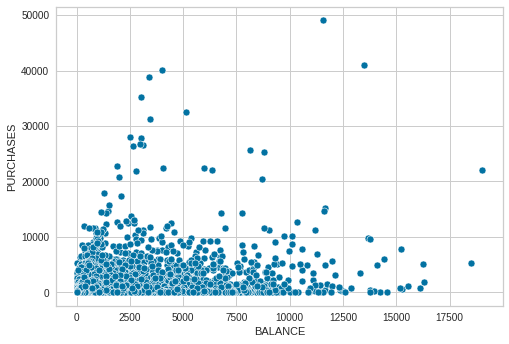

In [6]:
sns.scatterplot(data=data, x=data['BALANCE'], y=data['PURCHASES'])

**Drop null values**

In [7]:
data.dropna(axis=0, inplace=True)
data.drop('CUST_ID', axis=1, inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data.shape

(8636, 17)

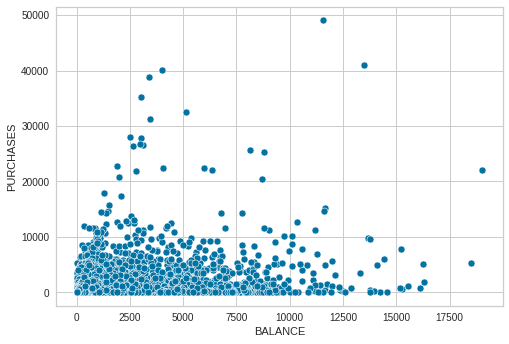

In [9]:
sns.scatterplot(data=data, x=data['BALANCE'], y=data['PURCHASES'])

## Dimensionality Reduction

In [10]:
# Scaling data
stanScal = StandardScaler()
df_scaled = stanScal.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled, columns = data.columns)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


#### PCA

In [11]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models
for n in range(2, 7):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df_scaled)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
2,PCA(n_components=2),0.476055
3,PCA(n_components=3),0.565238
4,PCA(n_components=4),0.640974
5,PCA(n_components=5),0.70374
6,PCA(n_components=6),0.760868


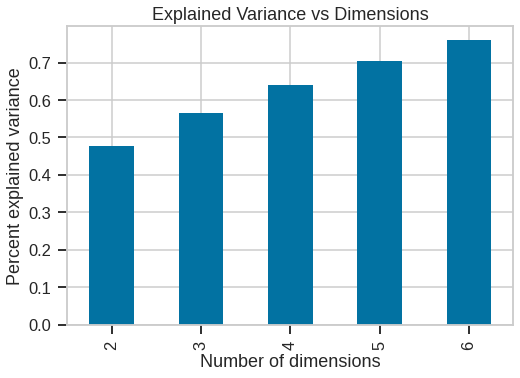

In [12]:
sns.set_context('talk')

ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

#### Feature importance

In [13]:
# get feauture importance
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))
features_df

features,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE
n,,,,,,,,,,,,,,,,,
2,0.074029,0.035315,0.069549,0.078664,0.070373,0.067474,0.051814,0.034154,0.061948,0.046012,0.078480,0.048505,0.068635,0.075855,0.067018,0.059913,0.012262
3,0.066399,0.068790,0.046400,0.060921,0.055361,0.054240,0.044669,0.047260,0.077559,0.040933,0.080609,0.050422,0.069563,0.085544,0.088984,0.047703,0.014644
4,0.068223,0.062671,0.053838,0.064696,0.065406,0.049199,0.038619,0.060835,0.066531,0.034401,0.066890,0.068010,0.056266,0.079663,0.085397,0.037126,0.042228
5,0.059355,0.076995,0.049179,0.061480,0.057916,0.047366,0.050962,0.073511,0.065142,0.058414,0.064971,0.066572,0.045886,0.069316,0.079049,0.032967,0.040919
6,0.052545,0.066562,0.048719,0.054150,0.054036,0.056255,0.050894,0.079988,0.064407,0.054817,0.058852,0.071456,0.049102,0.063576,0.069971,0.032120,0.072548


In [14]:
# get feauture importance values
temp = {'COL':[], 'SUM':[]}

for col in features_df.columns:
    temp['COL'].append(col)
    temp['SUM'].append(features_df[col].sum())

temp_df = pd.DataFrame(temp).sort_values('SUM', ascending=False, ignore_index=True)
temp_df


,COL,SUM
0,PURCHASES_INSTALLMENTS_FREQUENCY,0.390419
1,PURCHASES_FREQUENCY,0.373953
2,PAYMENTS,0.349801
3,ONEOFF_PURCHASES,0.335587
4,BALANCE,0.320551
5,CASH_ADVANCE_FREQUENCY,0.319910
6,BALANCE_FREQUENCY,0.310333
7,PRC_FULL_PAYMENT,0.304966
8,CASH_ADVANCE_TRX,0.303092
9,MINIMUM_PAYMENTS,0.295748


**features importance: (higher impo.)**
- PURCHASES_INSTALLMENTS_FREQUENCY
- PURCHASES_FREQUENCY
- PAYMENTS
- ONEOFF_PURCHASES
- BALANCE
- CASH_ADVANCE_FREQUENCY


In [15]:
high_impo_feau = temp_df['COL'][0:6]
high_impo_feau

0    PURCHASES_INSTALLMENTS_FREQUENCY
1                 PURCHASES_FREQUENCY
2                            PAYMENTS
3                    ONEOFF_PURCHASES
4                             BALANCE
5              CASH_ADVANCE_FREQUENCY
Name: COL, dtype: object

In [16]:
high_data = data[high_impo_feau]
high_data.describe()

,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,PAYMENTS,ONEOFF_PURCHASES,BALANCE,CASH_ADVANCE_FREQUENCY
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.368820,0.496000,1784.478099,604.901438,1601.224893,0.137604
std,0.398093,0.401273,2909.810090,1684.307803,2095.571300,0.201791
min,0.000000,0.000000,0.049513,0.000000,0.000000,0.000000
25%,0.000000,0.083333,418.559237,0.000000,148.095189,0.000000
50%,0.166667,0.500000,896.675701,44.995000,916.855459,0.000000
75%,0.750000,0.916667,1951.142090,599.100000,2105.195853,0.250000
max,1.000000,1.000000,50721.483360,40761.250000,19043.138560,1.500000


** high_data ---> columns with higher features importance **

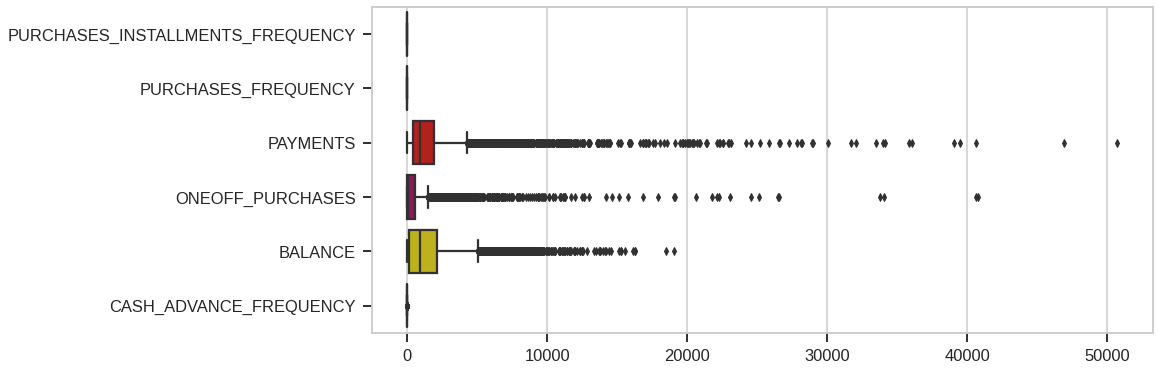

In [17]:
plt.figure(figsize=(14,6))
sns.boxplot( data=high_data, orient="h")

**We have outliers in all these features**

In [18]:
stat = {}
for col in high_data.columns:
  Q_1 = high_data[col].quantile(0.25)
  Q_3 = high_data[col].quantile(0.75) 
  IQR = Q_3 - Q_1
  IQR_1_5 = IQR * 1.5
  stat[col] = [Q_1, Q_3 , IQR_1_5]
  
for col in high_data.columns:
  mask1 = high_data[col] >= (stat[col][0] - stat[col][2])
  mask2 = high_data[col] <= (stat[col][1] + stat[col][2])
  mask = mask1 & mask2
  high_data = high_data[mask]

high_data.shape

(6621, 6)

In [19]:
high_data.describe()

,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,PAYMENTS,ONEOFF_PURCHASES,BALANCE,CASH_ADVANCE_FREQUENCY
count,6621.000000,6621.000000,6621.000000,6621.000000,6621.000000,6621.000000
mean,0.360354,0.470711,936.015065,221.464471,1004.437711,0.101244
std,0.394217,0.395212,840.061467,360.715269,1129.202139,0.147217
min,0.000000,0.000000,0.049513,0.000000,0.000000,0.000000
25%,0.000000,0.083333,341.196389,0.000000,84.830501,0.000000
50%,0.166667,0.416667,656.045331,0.000000,637.379659,0.000000
75%,0.750000,0.916667,1258.396242,315.300000,1502.000147,0.166667
max,1.000000,1.000000,4247.404958,1497.020000,5032.709807,0.625000


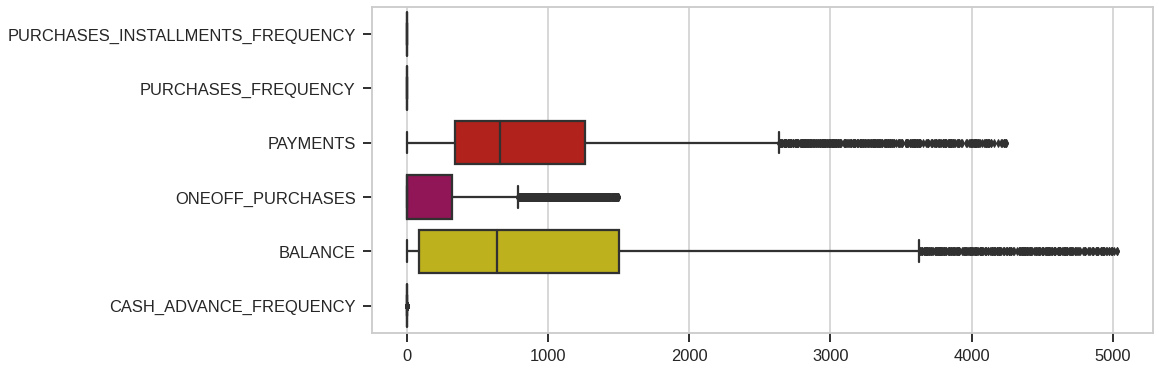

In [20]:
plt.figure(figsize=(14,6))
sns.boxplot( data=high_data, orient="h")

#### apply PCA

In [21]:
PCAmodel = PCA(n_components=3).fit(df_scaled)
PCA_data = PCAmodel.transform(df_scaled)
PCA_data = pd.DataFrame(PCA_data , columns=['PC1', 'PC2', 'PC3'])
PCA_data

,PC1,PC2,PC3
0,-1.696395,-1.122585,0.491555
1,-1.215680,2.435634,0.694613
2,0.935853,-0.385202,-0.025952
3,-1.614638,-0.724587,0.272351
4,0.223701,-0.783610,-1.184436
...,...,...,...
8631,-2.221637,-1.328411,1.643821
8632,-0.362326,-2.032248,-0.875047
8633,-0.930026,-1.841235,-0.350031
8634,-2.356010,-0.718730,1.048526


In [22]:
PCAmodel.explained_variance_ratio_.sum()

0.5652381823048219

In [23]:
PCA_data.describe()

,PC1,PC2,PC3
count,8.636000e+03,8636.000000,8.636000e+03
mean,-1.053143e-16,0.000000,-2.468305e-17
std,2.151705e+00,1.861191,1.231378e+00
min,-2.797928e+00,-2.734724,-1.026933e+01
25%,-1.501037e+00,-1.266294,-7.654287e-01
50%,-4.400970e-01,-0.477395,1.467423e-02
75%,7.716953e-01,0.741259,5.396540e-01
max,2.920073e+01,25.108904,1.595410e+01


dealing with outlieers in *PCA_data*

In [24]:
shapes = []
dff = PCA_data.copy()
for col in dff.columns:
  shapes.append(dff.shape)
  q1_col = dff[col].quantile(0.90)
  mask1 = dff[col] <= q1_col
  mask = mask1 & mask2
  dff = dff[mask1]

# PC3
q_col = dff['PC3'].quantile(0.05)
mask = dff['PC3'] >= q_col
dff = dff[mask]

shapes.append(dff.shape)

In [25]:
shapes

[(8636, 3), (7772, 3), (6994, 3), (5979, 3)]

In [68]:
PCA_data = dff.copy()
PCA_data.describe()

,PC1,PC2,PC3
count,5979.000000,5979.000000,5979.000000
mean,-0.470565,-0.447710,-0.127860
std,1.202347,1.144079,0.771357
min,-2.777477,-2.734724,-1.748419
25%,-1.554928,-1.360538,-0.701085
50%,-0.608826,-0.594864,0.016370
75%,0.393851,0.323889,0.367868
max,2.415290,2.350048,1.491785


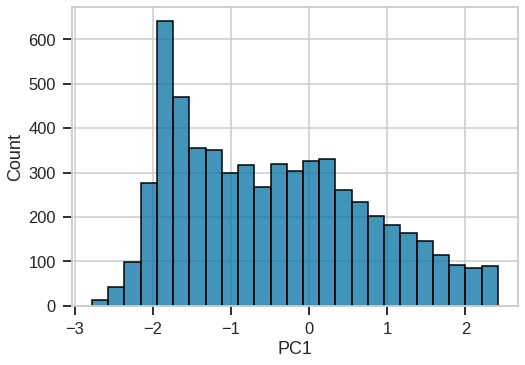

In [69]:
sns.histplot(data=PCA_data, x=dff['PC1'])

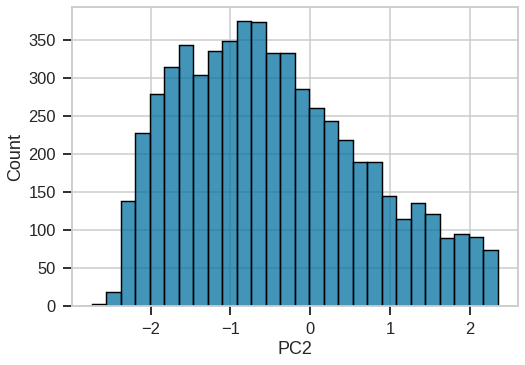

In [71]:
sns.histplot(data=PCA_data, x=dff['PC2'])

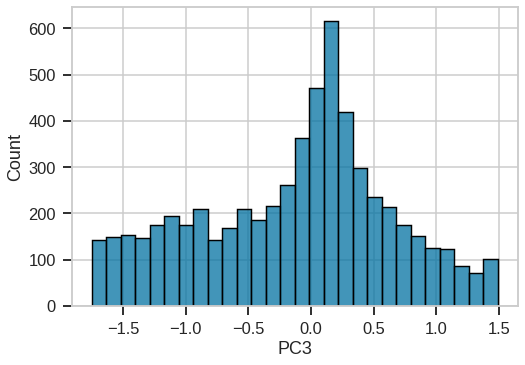

In [70]:
sns.histplot(data=PCA_data, x=dff['PC3'])

*** her we have 20 data set, one with higher features importance (*high_data*) , and one after apply (PCA) (*PCA_data*) ***

## Clustring

In [30]:
# Find number of clusters
def opt_num_clus(models , da, rang):
  inertia_list = []
  Silhouette_score_list = []
  ks = np.arange(2,rang,1)
  for k in ks:
    models.n_clusters = k
    model = models.fit(da)
    model.transform(da)
    inertia_list.append(model.inertia_)
    score = silhouette_score(da , model.labels_)
    Silhouette_score_list.append(score)

  return (inertia_list, Silhouette_score_list, ks)

In [31]:
# PLot Elbow
def plot_elbow(model, ks , data):
  Elb = KElbowVisualizer(model,  k=ks)
  Elb.fit(data)  # high_features_importance_data
  Elb.show()
  # plt.figure(figsize=(16,8))
  # plt.plot(ks, inertia_list, 'bx-')
  # plt.xlabel('k')
  # plt.ylabel('Distortion')
  # plt.title('The Elbow Method showing the optimal k')
  # plt.grid(True)
  # plt.show()

  # PLot Silhouette score
def plot_Silhouette_score(ks, Silhouette_score_list):
  plt.figure(figsize=(16,8))
  plt.plot(ks, Silhouette_score_list, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Silhouette score')
  plt.title('The Silhouette score Method showing the optimal k')
  plt.grid(True)
  plt.show()

In [32]:
def Silhouettevis(models, da,ran=10):
  fig, ax = plt.subplots(ran//2, 2, figsize=(10,10))
  for i in range(2,ran):
      models.n_clusters = i
      models.fit(da)
      #km = models(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
      q, mod = divmod(i, 2)

      visualizer = SilhouetteVisualizer(models, colors='yellowbrick', ax=ax[q-1][mod])
      visualizer.fit(da)

### K-means

In [33]:
#high_data.head(0)

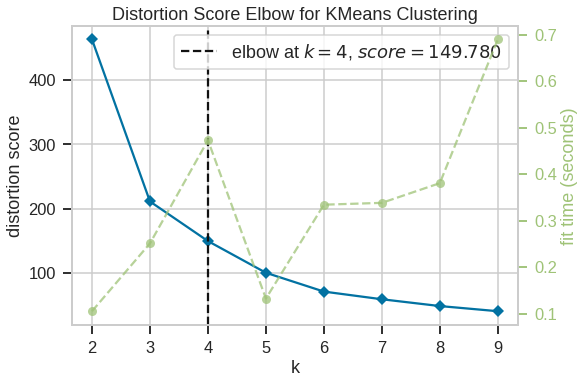

In [34]:
# try  KMeans on 2 higher features importance in (high_data) set
iner_ls, silh_lis, ks = opt_num_clus(KMeans() , high_data.iloc[: , 0:2], 10)
plot_elbow(KMeans(), ks , high_data.iloc[: , 0:2])  # plot elbow

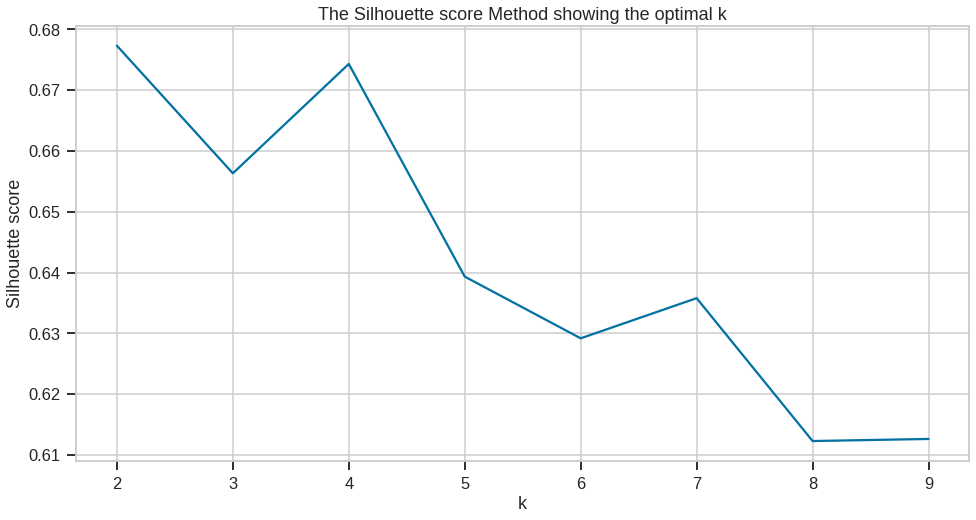

In [35]:
plot_Silhouette_score(ks, silh_lis)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


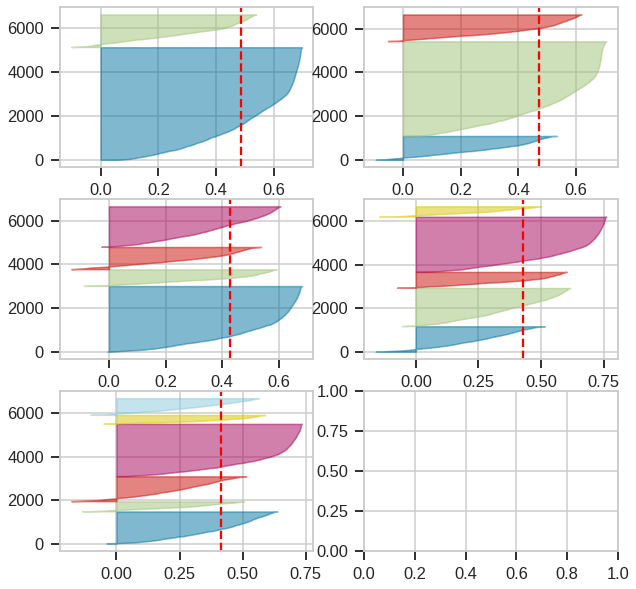

In [36]:
Silhouettevis(KMeans(), high_data, 7)

In [52]:
# training final KMeans() model on (high_data.iloc[: , 0:2])

kmeans_model = KMeans(n_clusters = 4).fit(high_data.iloc[: , 0:2])
kmeans_model.transform(high_data.iloc[: , 0:2])
predict_y = kmeans_model.predict(high_data.iloc[: , 0:2])
clusters = np.unique(predict_y)

high_data_wit_labels = high_data.copy()
high_data_wit_labels.loc[:,"cluster"] = kmeans_model.labels_

In [53]:
#high_data_wit_labels.columns

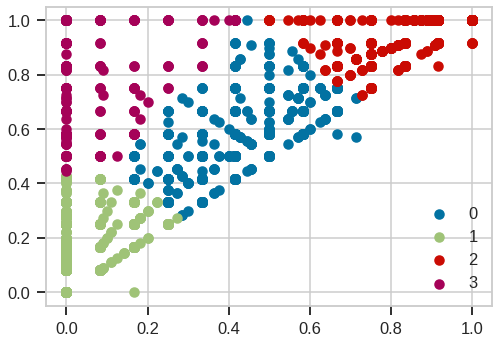

In [54]:
#u_labels = np.unique(clusters)
for i in clusters:
    plt.scatter(high_data_wit_labels[predict_y == i].iloc[:,0] , high_data_wit_labels[predict_y == i].iloc[:,1] , label = i)
plt.legend()
plt.show()

In [55]:
fig = px.scatter_3d(high_data_wit_labels,  x='PURCHASES_INSTALLMENTS_FREQUENCY', y='PURCHASES_FREQUENCY', z='cluster',
              color='cluster')
fig.show()

### AgglomerativeClustering

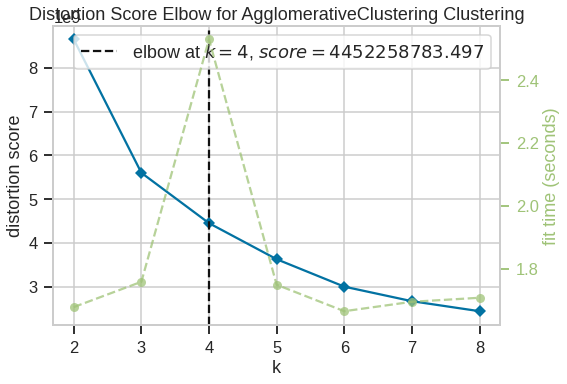

In [57]:
Elb = KElbowVisualizer(AgglomerativeClustering(), k=8)
Elb.fit(high_data)  # high_features_importance_data
Elb.show()

In [58]:
# define the model
modelAg = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhatAg = modelAg.fit_predict(high_data.iloc[: , 0:2])
# retrieve unique clusters
clustersAg = np.unique(yhatAg)

high_data_agg = high_data.copy()
high_data_agg.loc[:,"cluster"] = modelAg.labels_

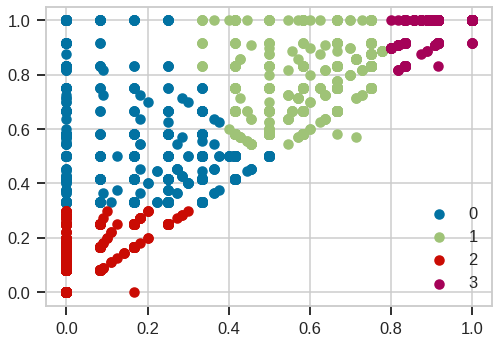

In [59]:
for i in clustersAg:
    plt.scatter(high_data_agg[yhatAg == i].iloc[:,0] , high_data_agg[yhatAg == i].iloc[:,1] , label = i)
plt.legend()
plt.show()


In [61]:
fig = px.scatter_3d(high_data_agg,  x='PURCHASES_INSTALLMENTS_FREQUENCY', y='PURCHASES_FREQUENCY', z='cluster',
              color='cluster')
fig.show()

### KMeans (PCA_data)

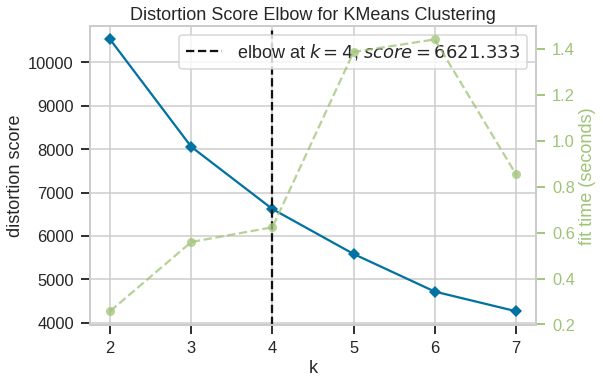

In [72]:
# try  KMeans on PCA_data (3-D data)
iner_ls, silh_lis, ks = opt_num_clus(KMeans() , PCA_data, 8)
plot_elbow(KMeans(), ks , PCA_data)  # plot elbow

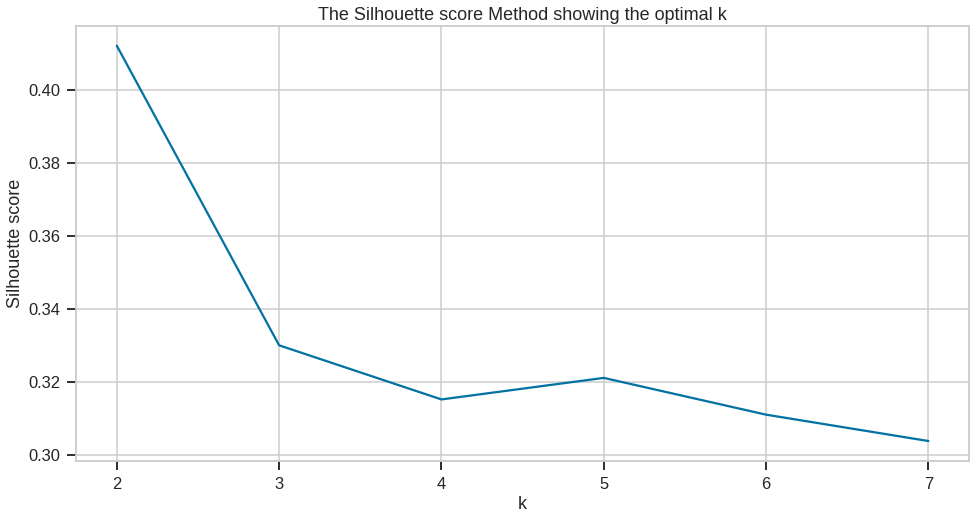

In [73]:
plot_Silhouette_score(ks, silh_lis)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



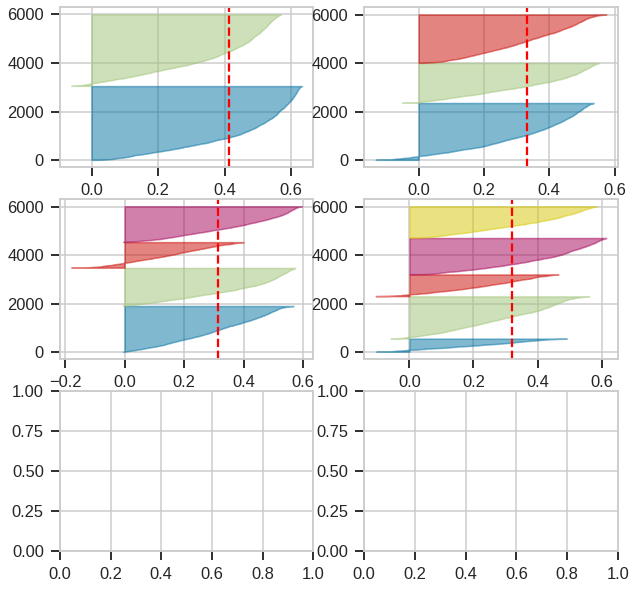

In [74]:
Silhouettevis(KMeans(), PCA_data, 6)

In [79]:
kmeans_pca = KMeans(n_clusters = 3).fit(PCA_data)
kmeans_pca.transform(PCA_data)
predict_y = kmeans_pca.predict(PCA_data)
clusters = np.unique(predict_y)

PCA_data_with_labels = PCA_data.copy()
PCA_data_with_labels.loc[:,"cluster"] = kmeans_pca.labels_

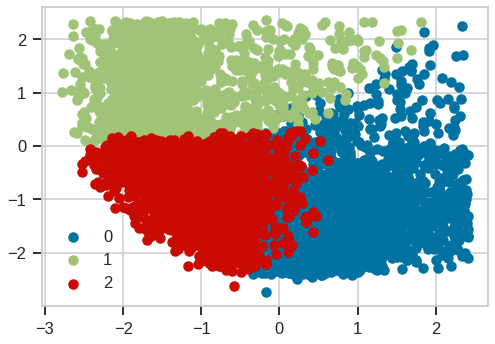

In [80]:
for i in clusters:
    plt.scatter(PCA_data_with_labels[predict_y == i].iloc[:,0] , PCA_data_with_labels[predict_y == i].iloc[:,1] , label = i)
plt.legend()
plt.show()

In [81]:
fig = px.scatter_3d(PCA_data_with_labels,  x='PC1', y='PC2', z='cluster',
              color='cluster')
fig.show()

# Final

**We have two data set after clustring:**

**1- high_data_wit_labels (scaling original data with labels)**

**2- PCA_data_with_labels (data result from (PCA) with labels)** 

In [87]:
high_data_wit_labels.head()

,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,PAYMENTS,ONEOFF_PURCHASES,BALANCE,CASH_ADVANCE_FREQUENCY,cluster
0,0.083333,0.166667,201.802084,0.00,40.900749,0.00,1
1,0.000000,0.000000,4103.032597,0.00,3202.467416,0.25,1
2,0.000000,1.000000,622.066742,773.17,2495.148862,0.00,3
4,0.000000,0.083333,678.334763,16.00,817.714335,0.00,1
5,0.583333,0.666667,1400.057770,0.00,1809.828751,0.00,0


In [88]:
high_data_wit_labels.shape

(6621, 7)

In [89]:
PCA_data_with_labels.head()

,PC1,PC2,PC3,cluster
0,-1.696395,-1.122585,0.491555,2
2,0.935853,-0.385202,-0.025952,0
3,-1.614638,-0.724587,0.272351,2
4,0.223701,-0.783610,-1.184436,0
7,-0.465339,-0.477696,0.097180,2


In [90]:
PCA_data_with_labels.shape

(5979, 4)